🎓 Capstone Group Project: E-Commerce Sales Analytics

Project Overview
This capstone project serves as the culmination of your learning journey in Statistics for Data Analytics. You will apply the complete range of statistical and analytical techniques covered in this course to a real-world e-commerce dataset.

The objective is to replicate the end-to-end workflow of a professional data analyst:

Clean and prepare messy business data.
Apply descriptive and inferential statistical techniques.
Build predictive models using regression and time-series methods.
Derive meaningful business insights and recommendations.
You will complete the project using Python and submit your work via Git/GitHub. At the end, you will not only demonstrate mastery of statistical concepts but also showcase your skills in reproducible analytics and professional reporting.

Dataset Description
The dataset (please find the dataset named “synthetic_retail_data.csv” from the portal) contains approximately 9,500 e-commerce transactions recorded during 2023. Each record represents a customer purchase and includes details on products, pricing, discounts, customer demographics, marketing channels, and purchasing behavior.

Key Variables

InvoiceNo – Unique transaction identifier
CustomerID – Unique customer identifier
Date – Date of purchase (2023)
ProductCategory – Electronics, Clothing, Home, Beauty, Sports, Toys
Quantity – Number of items purchased
UnitPrice – Price per item ($)
DiscountApplied – Discount percentage (0–55%)
ReviewRating – Customer rating (1–5 stars, some missing values)
IsFirstPurchase – Indicator for new vs. returning customers
MarketingChannel – Source of acquisition (Email, Organic, Referral, Ads, Social)
Country – Customer country (USA, UK, Germany, France, Canada, Australia)
TimeOnSite – Time spent on the website before purchase (seconds, some missing values)
ShippingCost – Shipping fee ($)
ItemsInCart – Items added to cart
PreviousSpending – Historical customer spending ($)
BrowsingSessions – Website visits prior to purchase
TotalAmount – Final transaction value including shipping ($)
Notable Characteristics

Seasonal patterns in sales (peaks in May, July, November, and December).
Category differences in pricing and popularity.
Presence of missing values in ReviewRating and TimeOnSite.
Approximately 2% of transactions contain extreme outliers in Quantity or UnitPrice.
 

Project Requirements
Data Preparation
Import and examine the dataset.
Identify missing values and apply appropriate treatment.
Detect and address outliers in dataset.
Prepare data for analysis and modeling.
Descriptive Statistics & Exploratory Analysis
Compute summary statistics (mean, median, mode, variance, standard deviation, IQR).
Generate distribution plots (histograms, boxplots, scatterplots).
Create pivot-style summaries (e.g., revenue by product category, revenue by country).
Probability & Hypothesis Testing
Estimate key probabilities (e.g., likelihood of 5-star review, probability of order value > $1,000).
Conduct hypothesis tests:
Two-Sample t-test: Compare mean spending between first-time and returning customers.
ANOVA: Test whether average spending differs across countries.
Chi-square test: Assess association between marketing channel and customer review ratings.
Confidence Intervals
Construct a 95% confidence interval for average daily revenue.
Construct a 95% confidence interval for average customer review rating.
Correlation & Regression Analysis
Create a correlation matrix of numeric variables.
Fit a multiple linear regression model to predict TotalAmount using predictors from the dataset.
Interpret coefficients and identify the strongest drivers of revenue.
Time Series Analysis
Construct a time series of daily or monthly sales.
Apply moving averages and exponential smoothing to forecast future sales.
Identify seasonal peaks and business trends.
 

Deliverables
You are required to submit a complete project via GitHub containing by October 11, 2025:

Jupyter Notebook / Python Scripts
Clean, well-documented code.
Logical structure aligned with project requirements.
README.md File
Project overview.
Dataset description.
Methods applied.
Summary of findings and key business insights.
Interpretive Commentary or Report (within the external Microsoft word document)
Explanations of results.
Business implications.
 

Grading Rubric
Correctness of Analysis – 16%
Code Quality & GitHub Submission – 8%
Interpretation of Results – 10%
Clarity of Documentation & Presentation – 6%
 

Instructor’s Note
Upon submission, we will conduct a live session demonstrating the same analyses step-by-step in Excel. This session will allow you to cross-validate your Python results, strengthen your conceptual understanding, and focus on translating statistical findings into actionable business recommendations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv('synthetic_retail_data.csv')
data.head()

,InvoiceNo,CustomerID,Date,ProductCategory,Quantity,UnitPrice,DiscountApplied,ReviewRating,IsFirstPurchase,MarketingChannel,...,ItemsInCart,PreviousSpending,BrowsingSessions,TotalAmount,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,INV105646,CUST1810,1/1/2023,Home,7,67.88,44.6,4.0,0,Organic,...,7,186.55,3,270.08,NaN,218.92136,NaN,475.16,211.92136,270.08
1,INV105099,CUST1530,1/1/2023,Toys,6,24.22,0.0,2.0,1,Social,...,8,0.00,3,155.16,NaN,8.00000,NaN,145.32,0.00000,155.16
2,INV102818,CUST1701,1/1/2023,Electronics,6,158.78,25.9,5.0,1,Email,...,6,0.00,3,719.29,NaN,252.74412,NaN,952.68,246.74412,719.29
3,INV107351,CUST1323,1/1/2023,Electronics,5,102.23,39.0,3.0,1,Social,...,6,0.00,5,324.19,NaN,205.34850,NaN,511.15,199.34850,324.19
4,INV108415,CUST1406,1/1/2023,Electronics,8,62.32,26.7,4.0,0,Email,...,8,371.94,4,387.06,NaN,141.11552,NaN,498.56,133.11552,387.06


In [4]:
print("\nMissing values per column:")
print(data.isnull().sum())

print("\nMissing values:")
print(data.isnull().values.any())


Missing values per column:
InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
Unnamed: 17         9500
Unnamed: 18         8271
Unnamed: 19         9500
Unnamed: 20         8271
Unnamed: 21         8271
Unnamed: 22         8271
dtype: int64

Missing values:
True


In [5]:
columns_drop = ["Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22"]
data_cleaned = data.drop(columns= columns_drop)
data_cleaned.head()

,InvoiceNo,CustomerID,Date,ProductCategory,Quantity,UnitPrice,DiscountApplied,ReviewRating,IsFirstPurchase,MarketingChannel,Country,TimeOnSite,ShippingCost,ItemsInCart,PreviousSpending,BrowsingSessions,TotalAmount
0,INV105646,CUST1810,1/1/2023,Home,7,67.88,44.6,4.0,0,Organic,USA,273.8,6.84,7,186.55,3,270.08
1,INV105099,CUST1530,1/1/2023,Toys,6,24.22,0.0,2.0,1,Social,USA,401.0,9.84,8,0.00,3,155.16
2,INV102818,CUST1701,1/1/2023,Electronics,6,158.78,25.9,5.0,1,Email,Germany,324.2,13.35,6,0.00,3,719.29
3,INV107351,CUST1323,1/1/2023,Electronics,5,102.23,39.0,3.0,1,Social,Australia,381.3,12.39,6,0.00,5,324.19
4,INV108415,CUST1406,1/1/2023,Electronics,8,62.32,26.7,4.0,0,Email,UK,206.5,21.62,8,371.94,4,387.06


In [6]:
print("\nMissing values per column:")
print(data_cleaned.isnull().sum())

print("\nMissing values:")
print(data_cleaned.isnull().values.any())


Missing values per column:
InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
dtype: int64

Missing values:
True


In [7]:
review_rating_count = data_cleaned['ReviewRating'].value_counts(dropna=False)
print("\nMissing values in 'ReviewRating' column:")
print(review_rating_count)


Missing values in 'ReviewRating' column:
ReviewRating
4.0    3048
3.0    2205
NaN    1665
5.0    1245
2.0     907
1.0     430
Name: count, dtype: int64


In [8]:
data_cleaned['ReviewRating'].fillna(data_cleaned['ReviewRating'].mode()[0], inplace=True)
print(data_cleaned['ReviewRating'].value_counts(dropna=False))

ReviewRating
4.0    4713
3.0    2205
5.0    1245
2.0     907
1.0     430
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_5488\3321287511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['ReviewRating'].fillna(data_cleaned['ReviewRating'].mode()[0], inplace=True)


In [9]:
TimeOnSite_value_count = data_cleaned['TimeOnSite'].value_counts(dropna=False)
print("\nMissing values in 'TimeOnSite' column:")
print(TimeOnSite_value_count)           


Missing values in 'TimeOnSite' column:
TimeOnSite
NaN      475
30.0     116
332.7     10
380.0      9
309.0      9
        ... 
423.6      1
145.8      1
526.2      1
499.1      1
313.1      1
Name: count, Length: 3922, dtype: int64


In [10]:
MarketingChannel_value_count = data_cleaned['MarketingChannel'].value_counts(dropna=False)
print("\nMissing values in 'MarketingChannel' column:")
print(MarketingChannel_value_count)


Missing values in 'MarketingChannel' column:
MarketingChannel
Email       2768
Organic     2349
Ads         1544
Referral    1401
Social       966
NaN          472
Name: count, dtype: int64


In [11]:
MarketingChannel_mode = data_cleaned['MarketingChannel'].mode()[0]
print(f"\nMode of 'MarketingChannel': {MarketingChannel_mode}")
data_cleaned['MarketingChannel'].fillna(data_cleaned['MarketingChannel'].mode()[0], inplace=True)
print(data_cleaned['MarketingChannel'].value_counts(dropna=False))


Mode of 'MarketingChannel': Email
MarketingChannel
Email       3240
Organic     2349
Ads         1544
Referral    1401
Social       966
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_5488\854813275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['MarketingChannel'].fillna(data_cleaned['MarketingChannel'].mode()[0], inplace=True)


In [12]:
TimeOnSite_mean = data_cleaned['TimeOnSite'].mean()
print(f"\nMean of 'TimeOnSite': {TimeOnSite_mean}")
data_cleaned['TimeOnSite'].fillna(TimeOnSite_mean, inplace=True)
print(data_cleaned['TimeOnSite'].value_counts(dropna=False))           


Mean of 'TimeOnSite': 299.5678781163435
TimeOnSite
299.567878    475
30.000000     116
332.700000     10
380.000000      9
309.000000      9
             ... 
423.600000      1
145.800000      1
526.200000      1
499.100000      1
313.100000      1
Name: count, Length: 3922, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_5488\1132779194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['TimeOnSite'].fillna(TimeOnSite_mean, inplace=True)


In [13]:
print("\nMissing values per column:")
print(data_cleaned.isnull().sum())

print("\nMissing values:")
print(data_cleaned.isnull().values.any())


Missing values per column:
InvoiceNo           0
CustomerID          0
Date                0
ProductCategory     0
Quantity            0
UnitPrice           0
DiscountApplied     0
ReviewRating        0
IsFirstPurchase     0
MarketingChannel    0
Country             0
TimeOnSite          0
ShippingCost        0
ItemsInCart         0
PreviousSpending    0
BrowsingSessions    0
TotalAmount         0
dtype: int64

Missing values:
False


In [14]:
#detecting outliers using interquartile range (IQR) method
# For numeric columns
numeric_cols = [
    'Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'TimeOnSite',
    'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount'
]
Q1 = data_cleaned[numeric_cols].quantile(0.25)
Q3 = data_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print("\nIQR values:")
print(IQR)
outliers = ((data_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (data_cleaned[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected:")
print(outliers.sum())


IQR values:
Quantity              5.0000
UnitPrice            42.3100
DiscountApplied      34.8000
ReviewRating          1.0000
TimeOnSite          150.7000
ShippingCost          6.6825
ItemsInCart           5.0000
PreviousSpending    336.7225
BrowsingSessions      2.0000
TotalAmount         318.4675
dtype: float64

Outliers detected:
Quantity            217
UnitPrice           525
DiscountApplied       0
ReviewRating        430
TimeOnSite           60
ShippingCost         33
ItemsInCart          62
PreviousSpending      0
BrowsingSessions     11
TotalAmount         690
dtype: int64


In [16]:
#addressing the outliers by capping them to the 1.5*IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numeric_cols:
    data_cleaned[col] = np.where(
        data_cleaned[col] < lower_bound[col], lower_bound[col],
        np.where(data_cleaned[col] > upper_bound[col], upper_bound[col], data_cleaned[col])
    )

print("\nOutliers have been capped at 1.5*IQR boundaries for all relevant numeric columns.")
#checking if outliers still exist
outliers_after_capping = ((data_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (data_cleaned[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected after capping:")
print(outliers_after_capping.sum())


Outliers have been capped at 1.5*IQR boundaries for all relevant numeric columns.

Outliers detected after capping:
Quantity            0
UnitPrice           0
DiscountApplied     0
ReviewRating        0
TimeOnSite          0
ShippingCost        0
ItemsInCart         0
PreviousSpending    0
BrowsingSessions    0
TotalAmount         0
dtype: int64


In [22]:
#Descriptive statistics after handling missing values and outliers
print("\nDescriptive statistics after handling missing values and outliers:")
#mean, median, mode, standard deviation, variance, min, max, range
desc_stats = data_cleaned[numeric_cols].describe().T
desc_stats['mode'] = [data_cleaned[col].mode()[0] for col in numeric_cols]
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']
desc_stats['variance'] = data_cleaned[numeric_cols].var()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
print(desc_stats)


Descriptive statistics after handling missing values and outliers:
                   count        mean         std    min       25%         50%  \
Quantity          9500.0    8.842579    3.578395   1.00    6.0000    9.000000   
UnitPrice         9500.0   56.334891   33.785229  10.06   31.3500   43.675000   
DiscountApplied   9500.0   18.181400   18.531475   0.00    0.0000   13.600000   
ReviewRating      9500.0    3.594842    0.929454   1.50    3.0000    4.000000   
TimeOnSite        9500.0  299.295541  114.759424  30.00  224.4000  299.567878   
ShippingCost      9500.0   10.035528    4.857920   0.00    6.6300    9.960000   
ItemsInCart       9500.0    9.661895    3.498763   1.00    7.0000    9.000000   
PreviousSpending  9500.0  209.090296  161.318720   0.00    0.0000  241.930000   
BrowsingSessions  9500.0    3.063579    1.437017   1.00    2.0000    3.000000   
TotalAmount       9500.0  392.910636  262.693229  20.26  199.9175  309.135000   

                       75%        max   

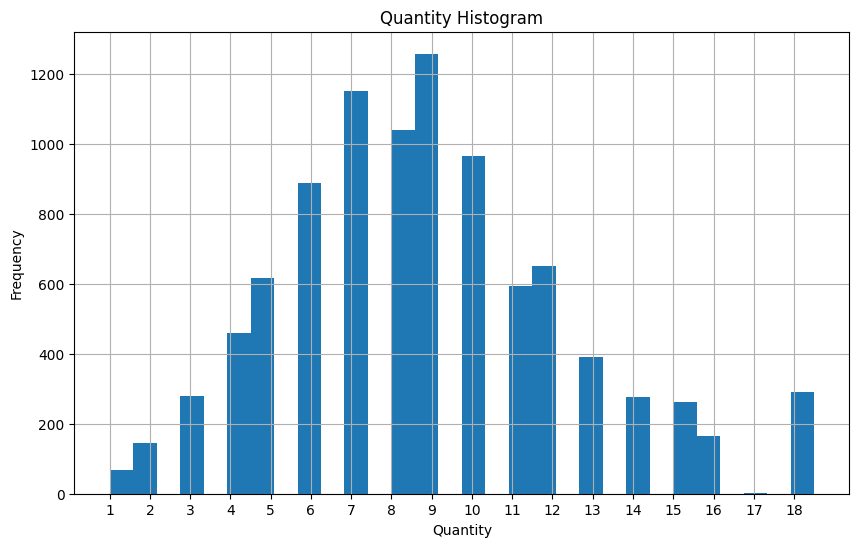

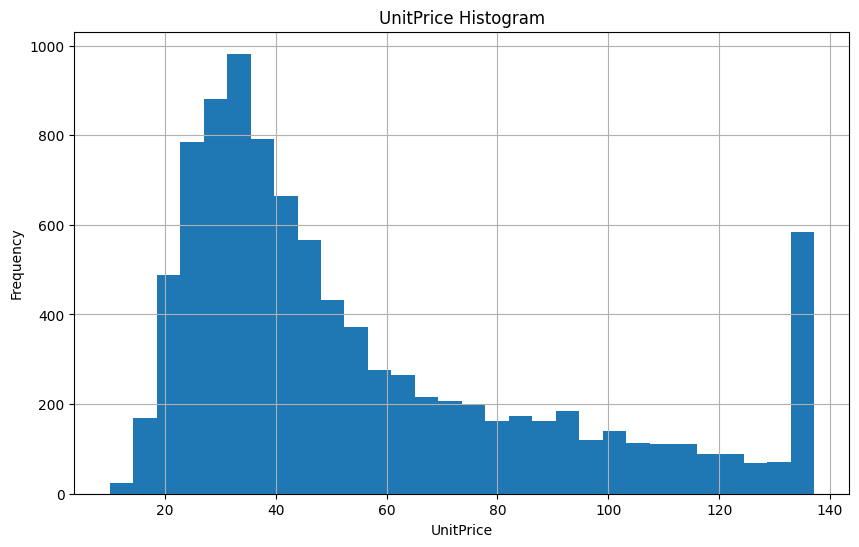

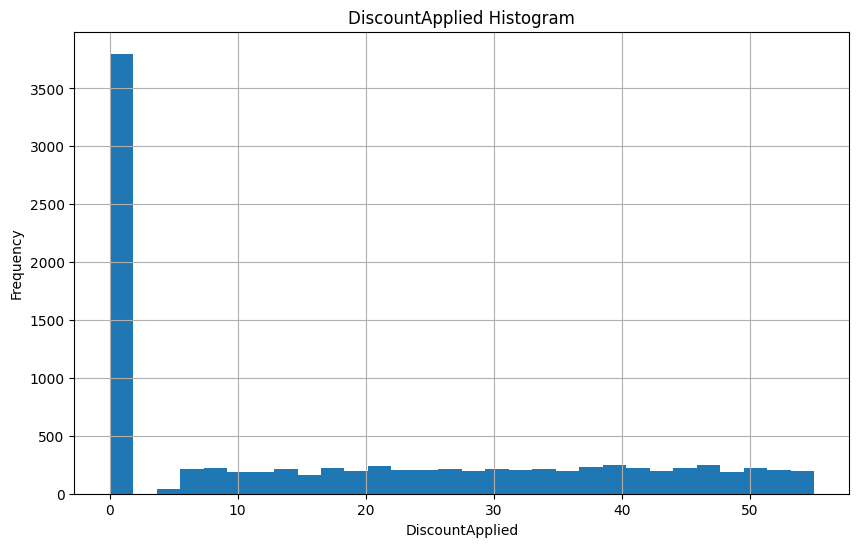

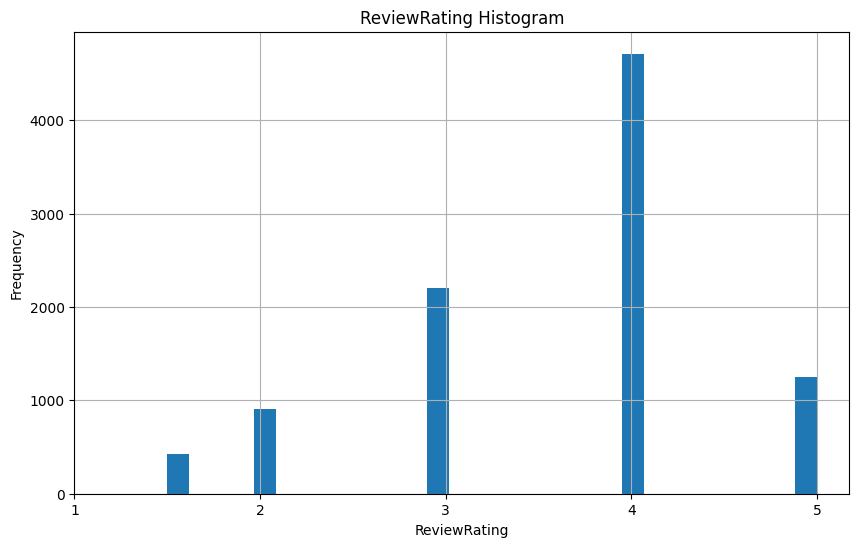

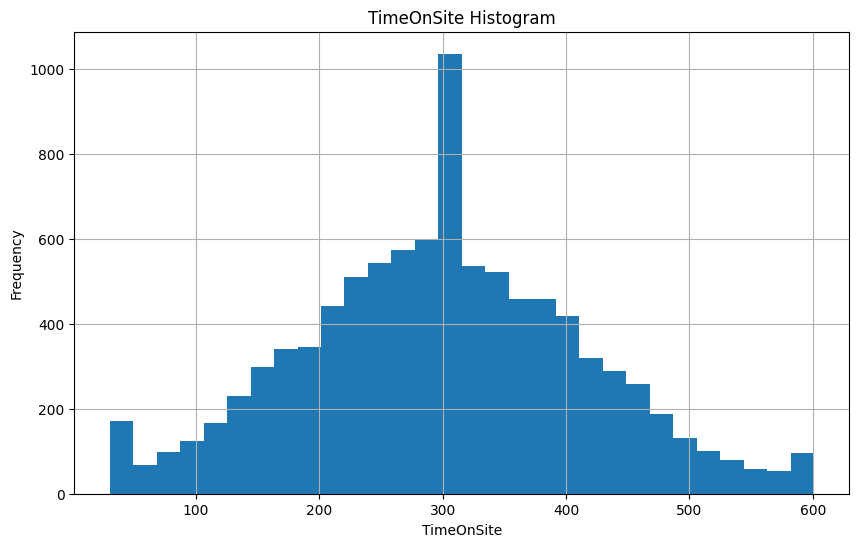

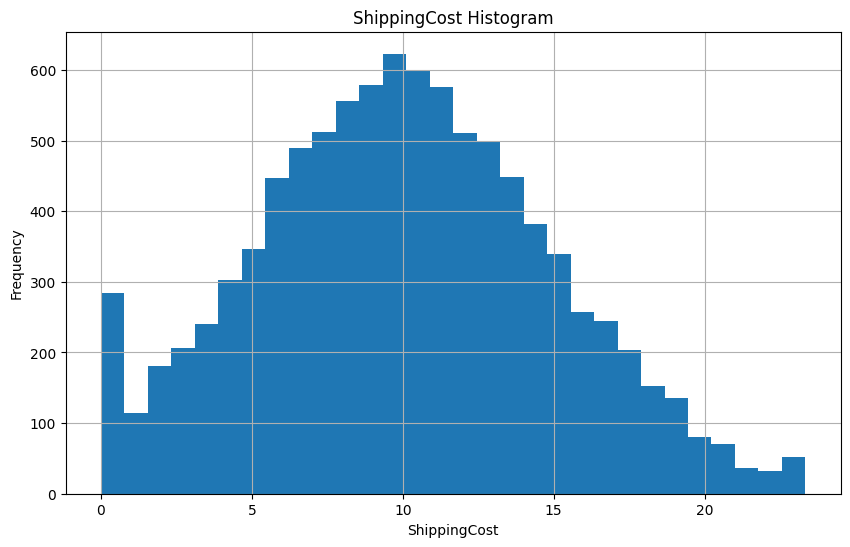

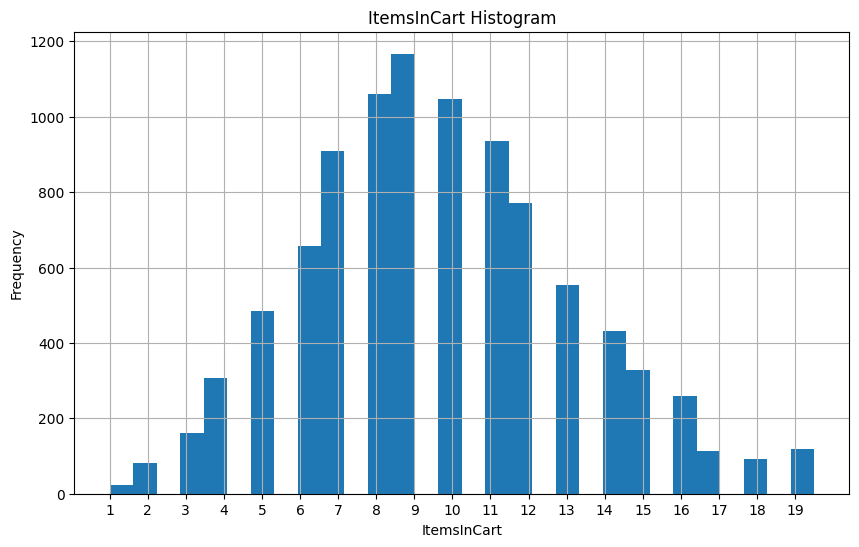

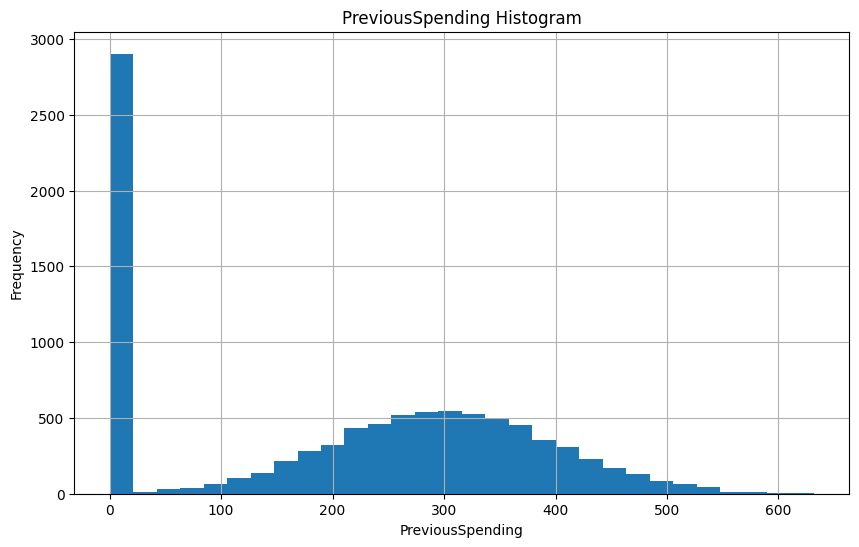

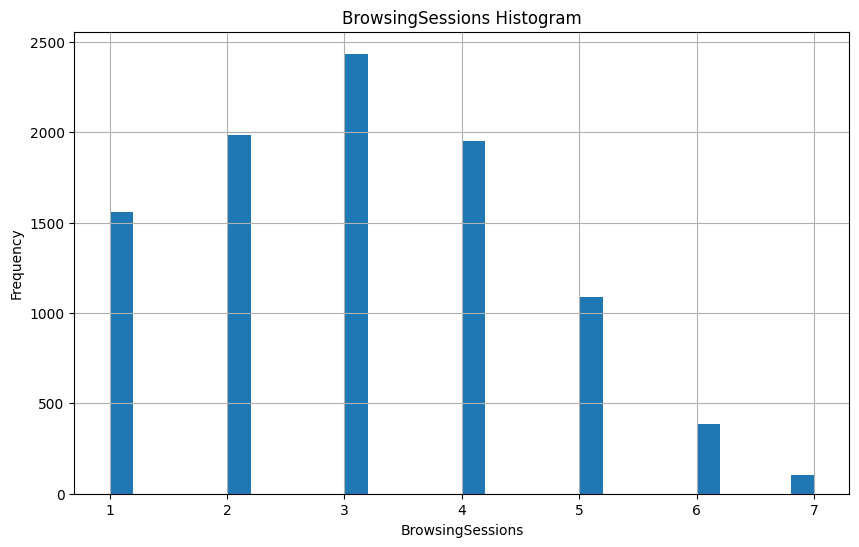

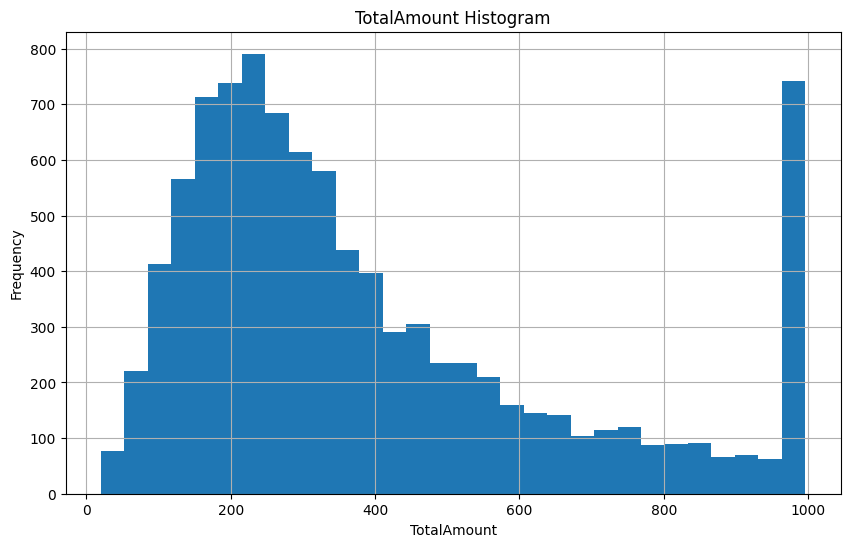

In [31]:
#Histogram for the columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    data_cleaned[col].hist(bins=30)
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Set x-axis ticks to integers for specific columns
    if col in ['Quantity', 'ReviewRating', 'ItemsInCart']:
        min_val = int(data_cleaned[col].min())
        max_val = int(data_cleaned[col].max())
        plt.xticks(range(min_val, max_val + 1))

    plt.show()

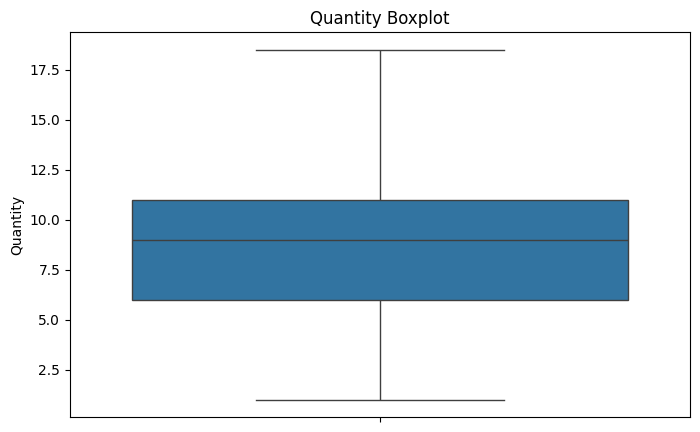

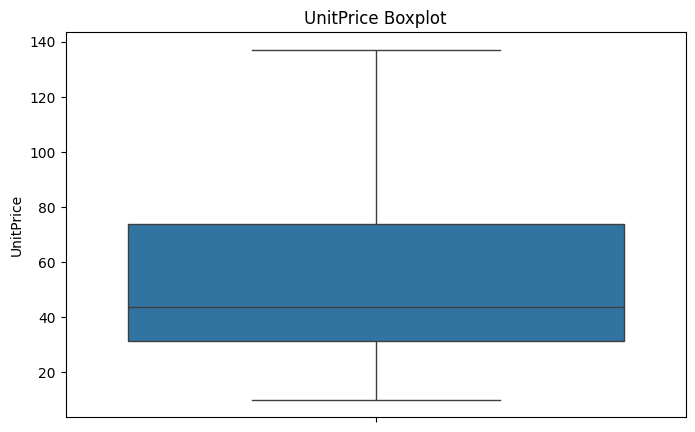

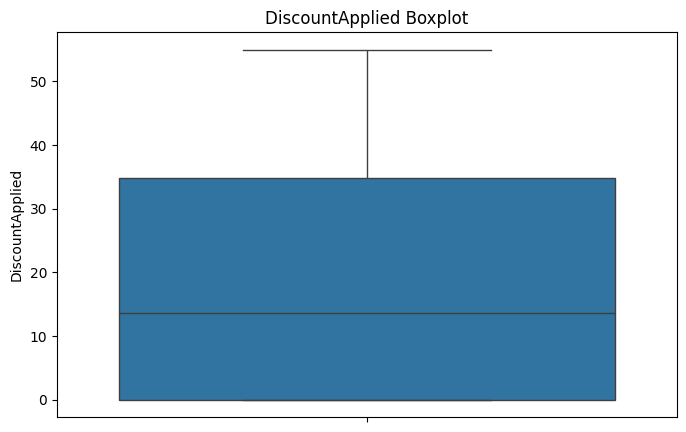

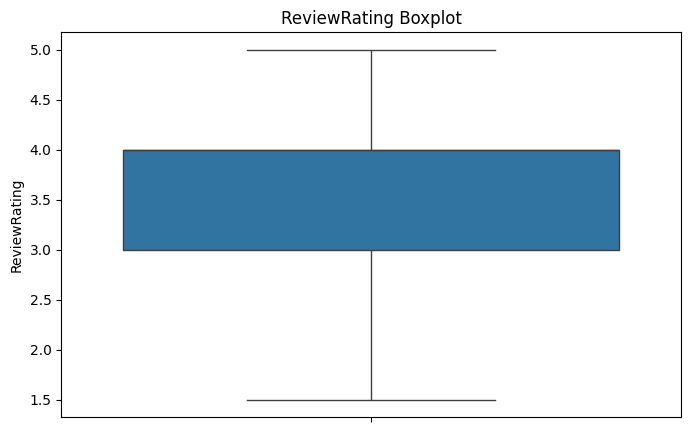

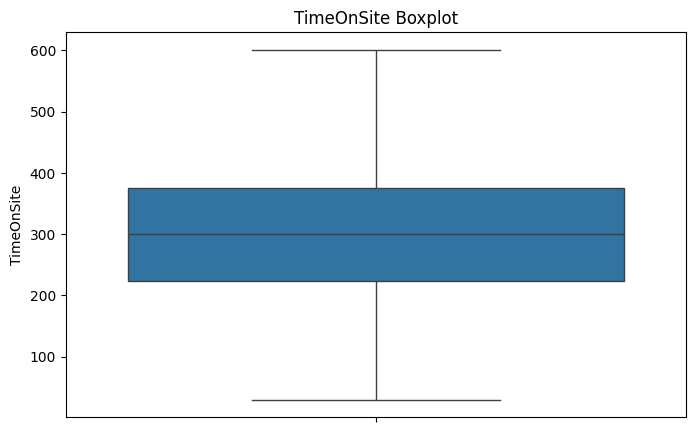

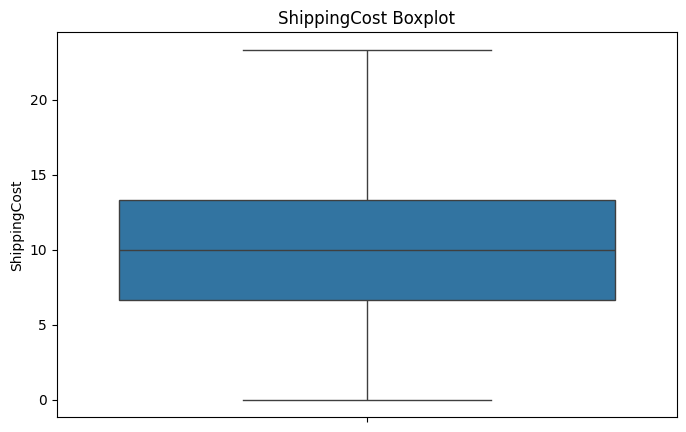

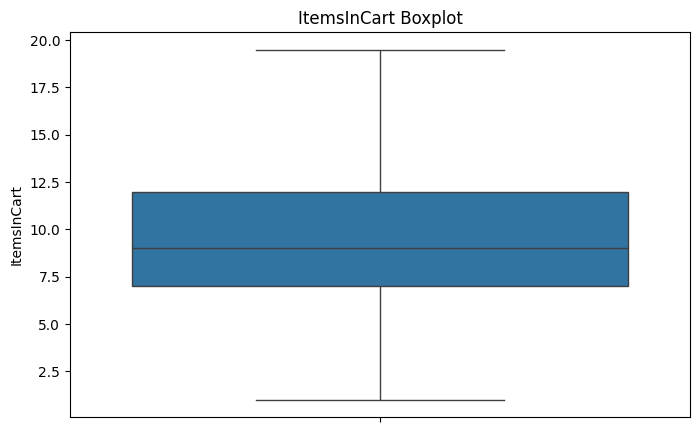

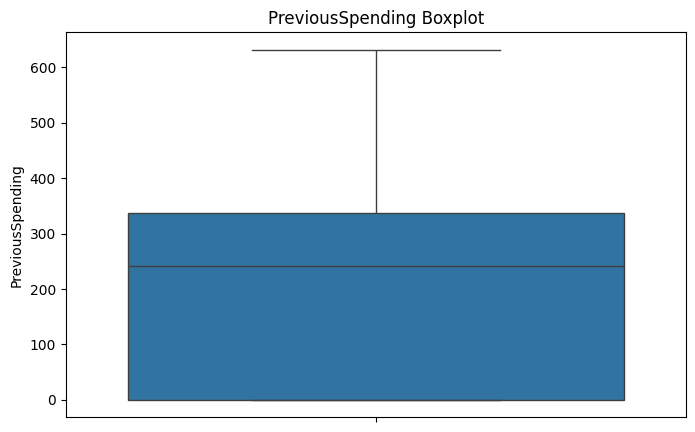

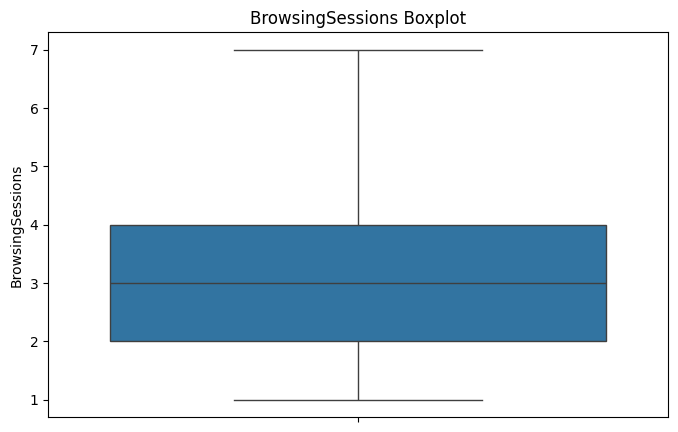

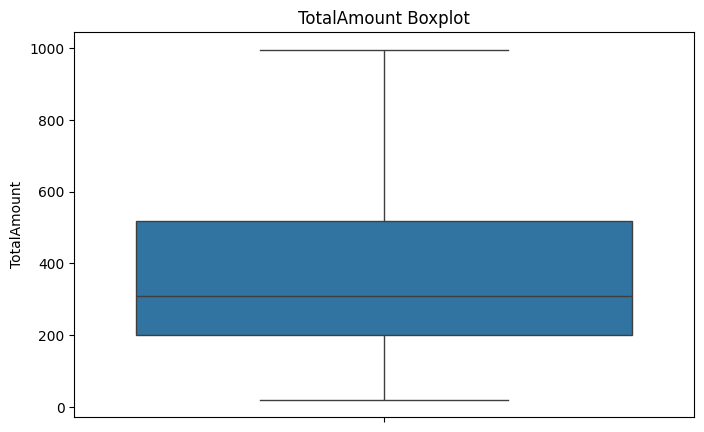

In [28]:
#boxplots for the columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'{col} Boxplot')
    plt.ylabel(col)
    plt.show()

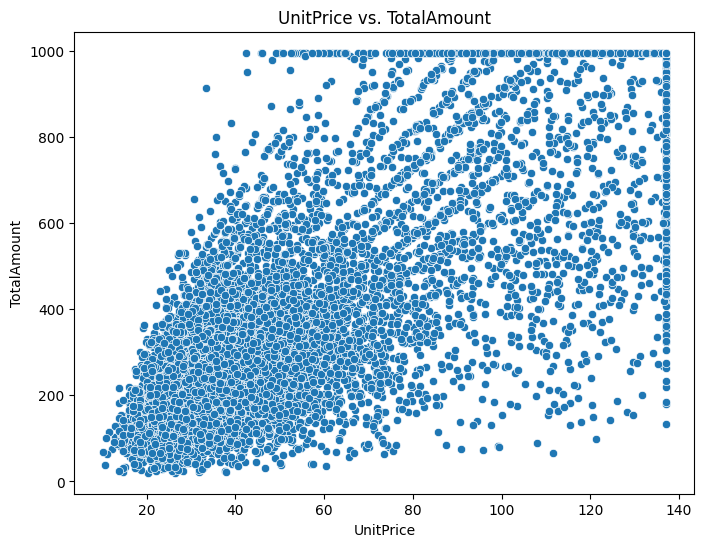

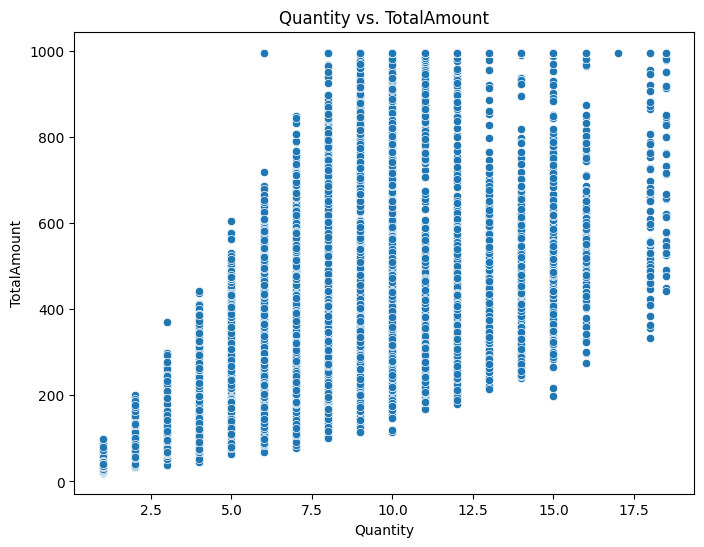

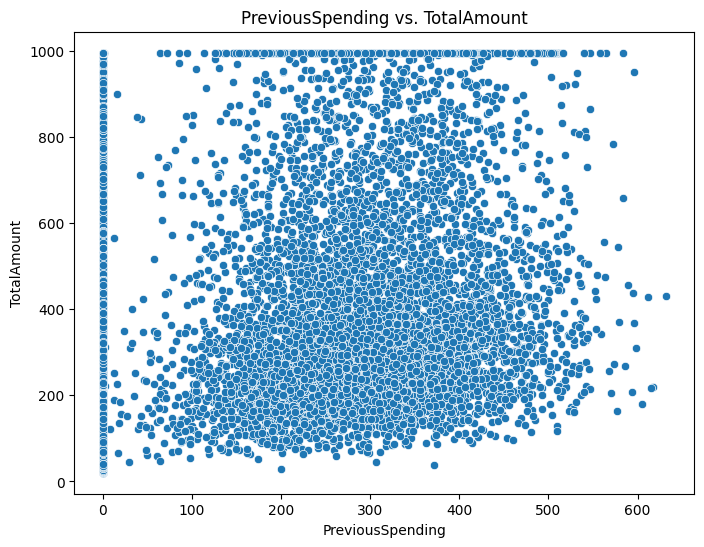

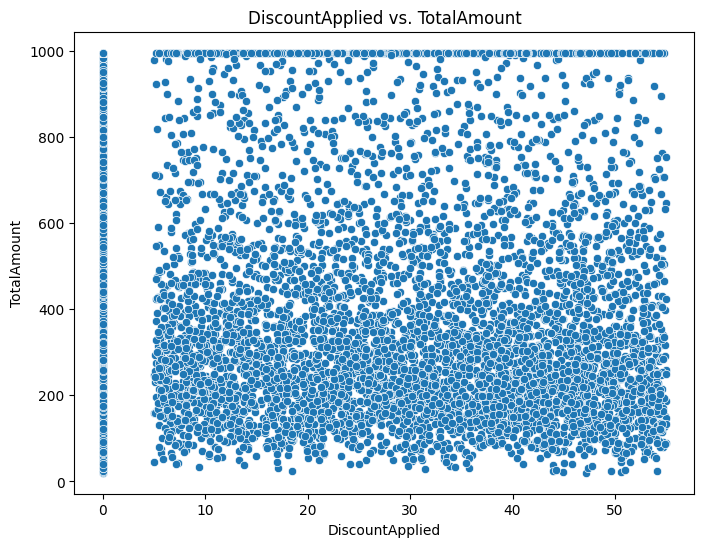

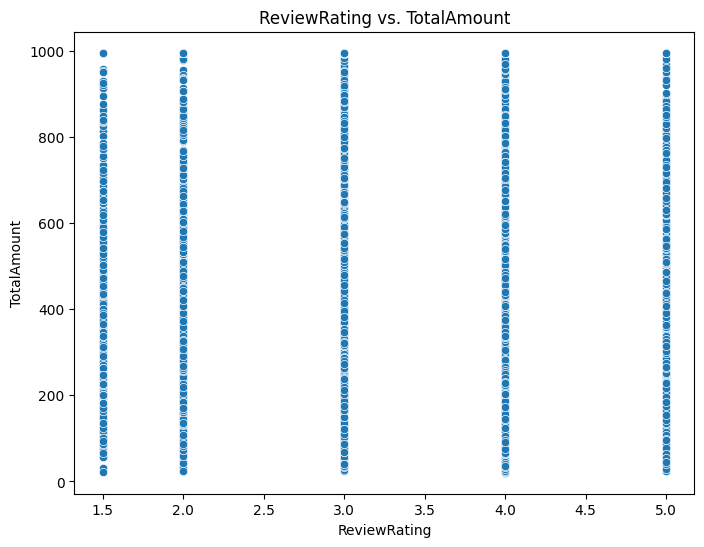

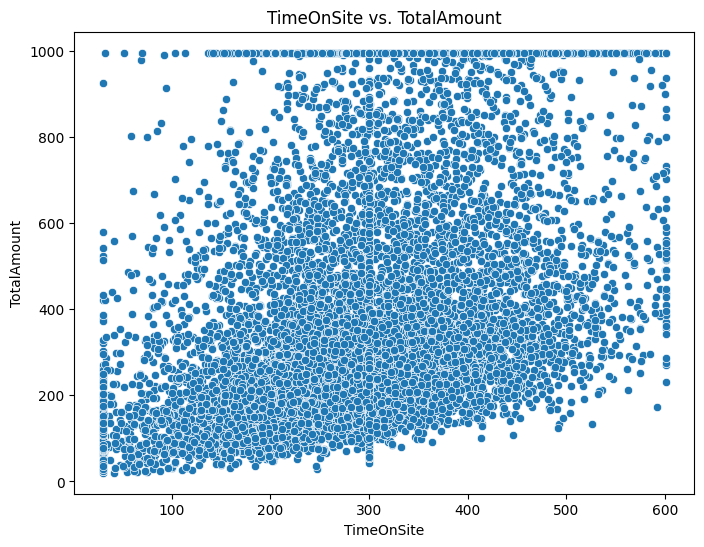

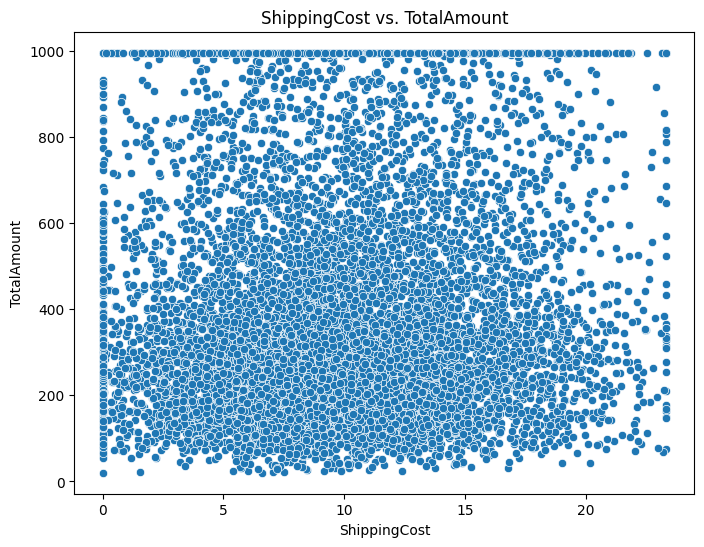

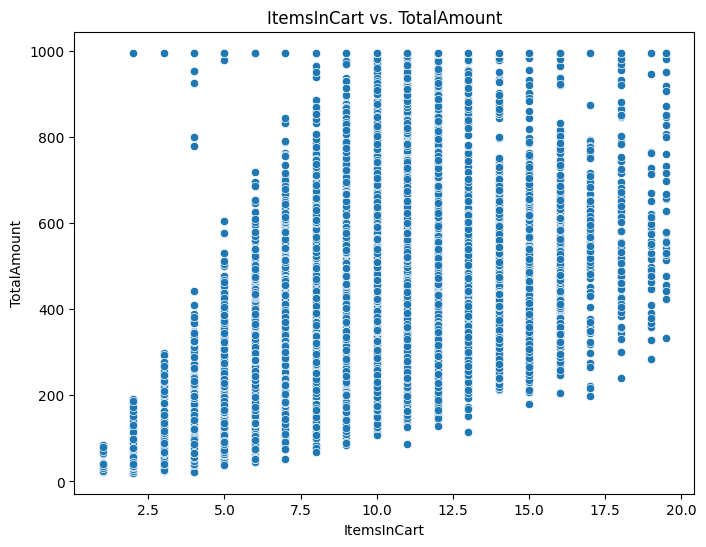

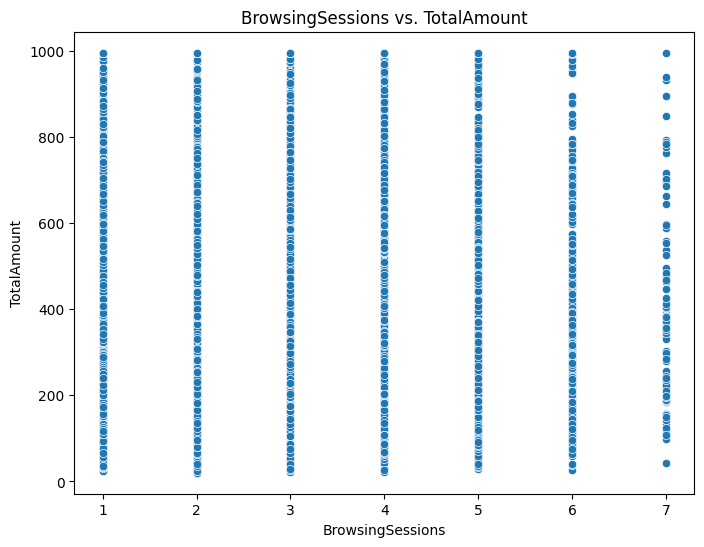

In [ ]:
# Scatter plot for columns vs. TotalAmount

columns_for_scatter_plot = [
    'UnitPrice','Quantity', 'PreviousSpending','DiscountApplied', 'ReviewRating', 'TimeOnSite',
    'ShippingCost', 'ItemsInCart', 'BrowsingSessions'
]

for column in columns_for_scatter_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='TotalAmount', data=data_cleaned)
    plt.title(f'{column} vs. TotalAmount')
    plt.xlabel(column)
    plt.ylabel('TotalAmount')
    plt.show()

In [ ]:
# Total revenue by ProductCategory
revenue_by_category = data_cleaned.pivot_table(
    values='TotalAmount',
    index='ProductCategory',
    aggfunc='sum'
).sort_values('TotalAmount', ascending=False)
print("Total Revenue by Product Category:")
print(revenue_by_category.map(lambda x: f"${x:,.2f}"))

# Total revenue by Country
revenue_by_country = data_cleaned.pivot_table(
    values='TotalAmount',
    index='Country',
    aggfunc='sum'
).sort_values('TotalAmount', ascending=False)
print("\nTotal Revenue by Country:")
print(revenue_by_country.map(lambda x: f"${x:,.2f}"))

# Average order value by MarketingChannel 
avg_order_by_channel = data_cleaned.pivot_table(
    values='TotalAmount',
    index='MarketingChannel',
    aggfunc='mean'
).sort_values('TotalAmount', ascending=False)
print("\nAverage Order Value by Marketing Channel:")
print(avg_order_by_channel.map(lambda x: f"${x:,.2f}"))

Total Revenue by Product Category:
                   TotalAmount
ProductCategory               
Electronics      $1,619,468.62
Clothing           $771,978.09
Home               $723,866.82
Sports             $307,358.43
Beauty             $216,547.47
Toys                $93,431.60

Total Revenue by Country:
             TotalAmount
Country                 
USA        $1,683,237.35
UK           $739,954.13
Germany      $536,595.04
France       $392,903.78
Australia    $203,817.45
Canada       $176,143.29

Average Order Value by Marketing Channel:
                 TotalAmount
MarketingChannel            
Ads                  $399.06
Organic              $395.16
Email                $392.37
Referral             $389.60
Social               $384.22
